# Who wants our shit?


The competition for online learning is increasing at an exponential pace, EDX,DataCamp, Microsoft, Coursera and sometimes it can be difficult to retain these people or better yet sell the courses to people. Microsoft pushes its content through Edx and can make money off certifications but also benefits from increased exposure to its BI and ML products like PowerBI and Azure Machine Learning. Therefore the markets we want might be professionals or perhaps students who need to show that they have a grasp on the skills. Bigger companies might be of interest. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",200)
%matplotlib inline

In [2]:
surveys = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

In [3]:
surveys.shape

(2882, 136)

In [4]:
print(surveys.head(2))

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber       CityPopulation  \
0                NaN             NaN  more than 1 million   
1                NaN             NaN    less than 100,000   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN                   NaN           NaN               NaN   
1                   NaN                   NaN           NaN               NaN   

   CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  \
0               NaN                  NaN              NaN   
1               NaN                  NaN              NaN   

   CodeEventNodeSchool  CodeEventNone  CodeEventOther  CodeEventRailsBridge  \
0                  NaN            NaN             NaN                   NaN  

Interesting Columns

- Is UnderEmployed
- Is Employed
- First DevJob
- Job Interests
- School Degree
- Employment Field

We are using this existing survey data because we would rather spend our money on the development of our webiste and its content rather than on marketing. We don't want the product to suffer so we are going to use our in-house talent to try to mine data from the world to find out who best to market our brilliant products to. Let's just see what we find shall we?

This dataset is from a similar website. E-Learning, which can be found here:

https://github.com/freeCodeCamp/2017-new-coder-survey


Questions that we want to answer:
- Where are these new coders located?
- What are the locations with the greatest number of new coders.

- How much money new coders are willing to spend on learning. 


Obviously, people can be interested in more than one role. 

Why wouldn't the sample be representative if people are interested in more than one thing? If anything, the more they are interested in, the broader the sample covers. Now you have more diversity, you are capturing more with these people. These answers come from a wide range of people interested in different things. Whatever. 

Don't ask that fucking question. There are like 300 goddamn unique answers. 






In [7]:
jobs = surveys['JobRoleInterest'].dropna().str.split(',')

In [8]:
n_of_options = jobs.apply(lambda x: len(x))

In [9]:
n_of_options.value_counts(normalize=True)

1     0.272727
3     0.180237
4     0.165217
2     0.125692
5     0.123320
6     0.067194
7     0.033202
8     0.011858
9     0.011067
10    0.004743
12    0.002372
11    0.002372
Name: JobRoleInterest, dtype: float64

(0, 100)

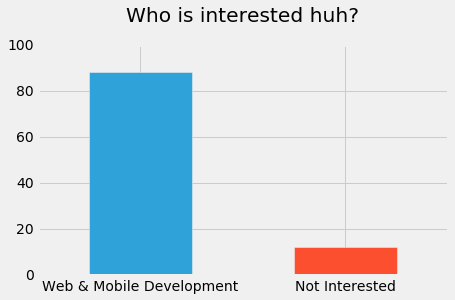

In [10]:
roles = surveys['JobRoleInterest'].dropna()
plt.style.use('fivethirtyeight')
webs = roles.str.contains('Web Developer|Mobile Developer')
(webs.value_counts(normalize=True)*100).plot.bar()
plt.xticks([0,1], ['Web & Mobile Development', 'Not Interested'], rotation = 0)
plt.title("Who is interested huh?", y = 1.08)
plt.tight_layout(False)
plt.ylim([0,100])


We measured just how many people would actually be interested in this shit and found that over 80% of these people are actually interested in what we have to sell. So that's good. This is representative of the population we are trying to find answers for. Most of them, we would say this sample is representative. Therefore, the answers we mine from this notebook might provide decent predictions about what the 'actual' population might be into, beyaaaaatch. 


In [36]:
roles = surveys.dropna(subset  =['JobRoleInterest'])

In [37]:
absolute = roles['CountryLive'].value_counts()
relative = roles['CountryLive'].value_counts(normalize = True).round(2)*100
table = pd.DataFrame({'Absolute Frequencies':absolute,
        'Relative Frequencies': relative})
table.head(10)

,Absolute Frequencies,Relative Frequencies
United States of America,620,50.0
India,105,8.0
United Kingdom,64,5.0
Canada,49,4.0
Germany,26,2.0
Poland,24,2.0
Brazil,23,2.0
Australia,19,2.0
Romania,14,1.0
Russia,13,1.0


Looks like the US & India are the go-to's for this analysis. Although, we should probably look into what are the interests in these populations. If most of the people in India aren't interested in web or mobile development, it wouldn't make sense to try to market to them. 

Also, whether they are willing to spend money on learning is a barrier as well. Let's keep looking to make sure. One thing is, the US is a big marktet. 

In [38]:
roles['MonthsProgramming'] = roles['MonthsProgramming'].replace(0, 1)
roles['Money_Spent'] = roles['MoneyForLearning'] / roles['MonthsProgramming']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
print(roles['Money_Spent'].isnull().sum(), len(roles['Money_Spent']))

122 1265


In [40]:
roles = roles.dropna(subset=['Money_Spent', 'CountryLive'])

In [41]:
money_per_month = roles.groupby('CountryLive').mean()
money_per_month['Money_Spent'][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    262.466988
India                       119.467205
United Kingdom               18.921319
Canada                       35.808258
Name: Money_Spent, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


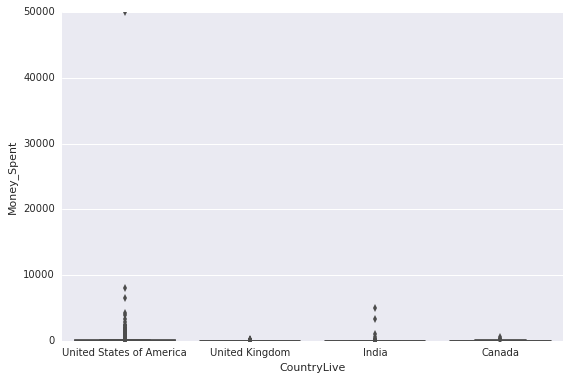

In [70]:
import seaborn as sns

only_4 = roles[roles['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
sns.boxplot(y = 'Money_Spent', x = 'CountryLive',
            data = only_4)

In [71]:
roles[roles['Money_Spent'] > 3000][['Money_Spent','CountryLive','AttendedBootcamp']]

,Money_Spent,CountryLive,AttendedBootcamp
88,4800.000000,Australia,1.0
712,20000.000000,Australia,1.0
718,8000.000000,United States of America,1.0
723,4000.000000,United States of America,1.0
1222,6500.000000,United States of America,1.0
1728,5000.000000,India,0.0
1755,3333.333333,India,0.0
2197,12000.000000,Austria,0.0
2432,3250.000000,United States of America,0.0
2478,50000.000000,United States of America,1.0


In [72]:
roles[(roles['Money_Spent'] > 3000)
    ].sort_values('Money_Spent', ascending = False)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_Spent
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,trans,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,b84e33311d235660ad1b7a918d7d7df4,b3229f43317af29a4d23734f9d543222,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,English,"single, never married",100000.0,2.0,befcbda814,2017-03-10 23:30:16,2017-03-10 23:26:33,2017-03-10 23:31:50,2017-03-10 23:30:19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,"some college credit, no degree",NaN,48000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
712,28.0,1.0,0.0,1.0,Coder Factory,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45 to 60 minutes,Australia,Australia,law enforcement and fire and rescue,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,f0da927a9275d563c58b72e1419a1ef0,88712c32973550df0107d603331ff7c4,50000.0,0.0,0.0,0.0,0.0,Within the next 6 months,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Full-Stack Web Developer, Back-End Web Developer",in an office with other developers,English,"single, never married",20000.0,1.0,01d22d02e6,2017-03-09 21:22:28,2017-03-09 21:18:46,2017-03-09 21:34:43,2017-03-09 21:22:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,N

In [73]:
only_4 = only_4.drop([718,1222, 1728, 1755,2478])

In [75]:
money_per_month = only_4.groupby('CountryLive').mean()
money_per_month['Money_Spent'][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    152.427957
India                        29.529439
United Kingdom               18.921319
Canada                       35.808258
Name: Money_Spent, dtype: float64

Probably Canada & The US are our best options. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


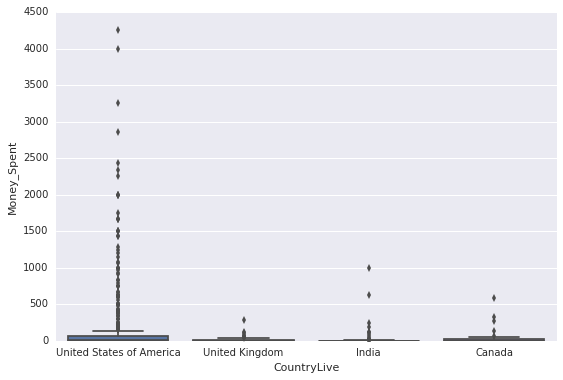

In [76]:
sns.boxplot(y = 'Money_Spent', x = 'CountryLive',
            data = only_4)

In [90]:
def z_score(val, data):
    score = ((val - data.mean()) / data.std()).round(4)
    return score


In [95]:
scores = []
countries = ['United States of America', 'India', 'United Kingdom','Canada']
for each in countries:
    scores.append((each, z_score(59, only_4[only_4['CountryLive'] == each]['Money_Spent'])))





In [96]:
scores

[('United States of America', -0.2076),
 ('India', 0.2302),
 ('United Kingdom', 0.8967),
 ('Canada', 0.2191)]

It might behoove us to market to India as well as Canada. Their Z-Scores are similarly close to Zero, which means a monthly cost of $59 is probably not uncommon. 